**Question 1: Explain the basic structure and working of a simple Artificial Neural Network (ANN).
In your explanation, include the following points: (Marks 20)**

The role of neurons and layers in an ANN:

Answer. The role of a neuron in a neural network is the same as the role of a single neuron in the human brain. The collective function of all the neurons becomes the main function in an artificial neural network.

ANN consist of :


1.  The input layer which is responsible for taking the input from the user.
2.  Hidden(Latent) Layers for processing the given data.
3.  Output Layer for giving the final output after processing

**Working:**
   First we give data as input through the input layer of the artificial neural network.Then the interconnected hidden layers process the given data for feature extraction, normalization etc.The at the end the output layer displays the output at the end.All the layers in the ANN are interconnected . That's why we also call it a FULLY CONNECTED NEURAL NETWORK.



**How information flows through the network.**

Answer. First of all the information is given to the model through the input and the the hiddenand output layers of the model are defined . When we compile the model, all the layers of the ANN become interconnected the propogation of the information starts to take place in forward direction.
The middle or latent layers of the model sart to analyse the complexities in the data and start to extract the patterns from the data . Then when the number of epoches are completed , the data is passed down to the output layer which at the end displays the results.

**The significance of activation functions and provide examples of commonly used activation
functions.**

Answer. Each activation function in an artificial neural network functions is a neuron which has a particular function that it performs. This activation function will be given a particular function that will be performed by this Activation function. An activation function is a mathematical function. This mathematical function can be as simple as telling us which of the two values is the maximum value. It can also be as simple as telling us an average of the given values. The activation function in artificial neural network helps us by performing these simple tasks to simplify and solve a complex task. This can be used for classification and other uses in an artificial neural network.

Some of the most popular activation functions that are used in an artificial neural network are:
  

*   ReLU when we don't know what type of activation function we should use.
*   Sigmoid when it is a binary classification.
*   We use soft mass when there is a multiclass classification problem.

**The concept of weights and biases and their role in training an ANN:**

Answer.The weights in a neural network tell us about the strength of the neuron  in that neural network.

The biases in the neural network tell us about that point when a particular neuron is activated.

**Weights:**These are the coefficiects that are applied to the input and tell us about the importance or strength of each neuron in the output. The weigth is decided by comparing the error in the ouput to the actual expected results.

**Biases:**Biases in artificial neural network or extra coefficients that are added to the weight before activating the activation function. The buses make sure that the activation function is triggered or fired at the right moment so that. The desired patterns are extracted from the data and are results are achieved.





**Question 2: Build a FCNN to recognize handwritten digits. Use MNIST handwritten digit data set.
Your network should have: (Marks 20)**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras import models,layers
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

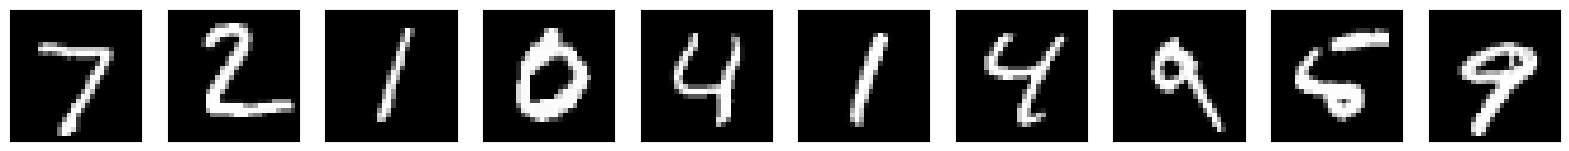

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()



In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
input_size=784
batch_size=128
hidden1=128
hidden2=128
classes=10
epochs=10


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the input image
    layers.Dense(128, activation='relu'),  # First dense layer with 512 units
    layers.Dense(128, activation='relu'),  # Second dense layer with 256 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each class)
])


In [ ]:
model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="sgd")

In [ ]:
cal = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs , verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.3183 - accuracy: 0.6691
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5157 - accuracy: 0.8670
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3942 - accuracy: 0.8909
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3466 - accuracy: 0.9027
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3181 - accuracy: 0.9094
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2977 - accuracy: 0.9151
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2812 - accuracy: 0.9197
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2676 - accuracy: 0.9238
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2558 - accuracy: 0.9272
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2452 - accuracy: 0.9301

In [ ]:
y_pred_prob = model.predict(x_test)

y_pred= np.argmax(y_pred_prob, axis=1)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9326


In [ ]:
mask=range(20,50)

x_valid= x_test[0:20]

actual_labels= y_test[0:20]

y_pred_probs_valid= model.predict(x_valid)

y_pred_valid= np.where(y_pred_probs_valid> 0.5, 1, 0)

1/1 [==============================] - 0s 70ms/step


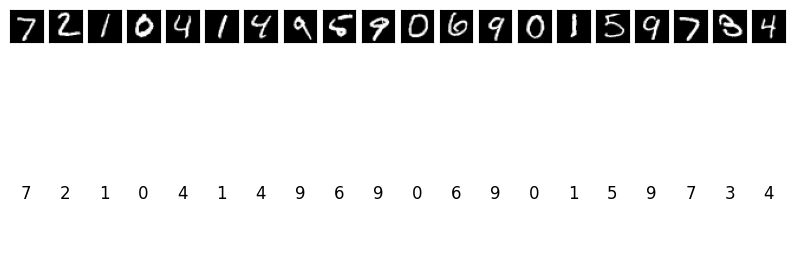

In [ ]:
n=len(x_valid)

plt.figure(figsize=(10,4))

for i in range(n):
  ax= plt.subplot(2,n,i+1)
  plt.imshow(x_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  predicted_digit= np.argmax(y_pred_probs_valid[i])
  ax=plt.subplot(2,n,i+1+n)
  plt.text(0.5,0.5, str(predicted_digit),fontsize=12, ha="center", va="center")
  plt.axis("off")

plt.show()

plt.close()

**Question 3: Explain the importance of hyperparameter tuning in training an ANN. List at least
three hyperparameters commonly tuned in ANN training and describe their impact on the
model's performance. (Marks 20)**

**Hyperparameter:**

Hyperparameters are the configuration settings used to set the learning process of an artificial neural network (ANN). They are not learned from the data but set before the training and include choices like learning rate, number of epochs and batch size etc.Their role is crucial as they directly control the behavior of the training algorithm and have a significant impact on the performance of the model.

**Learning rate:**

The learning rate can be defined as the size of the step that the model takes to minimize the loss and to achieve the optimal level during gradient descent. It tells us how much the model learns when it takes each step.A high learning rate is not favourable because the model might pass through the optimal level with the least loss and head towards greater loss.If the learning rate is too low, it can take an unreasonably long time for the model to be fully trained.

**Epoches:**

It is the number of times the model will go through the entire dataset.when the model completes an entire round of the whole dataset, it covers 1 epoche.
With more epoches the model will go through the dataset many times and hence increase accuracy but note that the loss will decrease upto a certain number of epoches and after that the model will not improve . This means that the model does not have the capacity to further learn from the daataset.

**Batch size:**

The entire entire dataset cannot be provided to the model in one go because the dataset is too big and the context window of the model is too samll so we divide the dataset into smaller chunks.Thus the chunk of data we will take out of the dataset is known as batch size.

**Write a Python script to create and compare the performance of an ANN using
different activation functions (ReLU, Sigmoid, and Tanh) for the hidden layers. Use a simple
dataset (e.g., Iris dataset) to train and evaluate the models. Report the accuracy for each
activation function. (Marks 20)**


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
igris= datasets.load_iris()

In [ ]:
X = igris.data
y = igris.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)  # Adjust test_size and random_state as needed


In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (120, 4)
y_train shape: (120,)
x_test shape: (30, 4)
y_test shape: (30,)


In [ ]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
y_train = to_categorical(y_train, num_classes=classes)
y_test = to_categorical(y_test, num_classes=classes)

In [ ]:
input_size=64
batch_size=50
hidden1=100
hidden2=50
classes=3
epochs=100

**This is for relu**

In [ ]:
model=Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(4,)))

model.add(Dense(hidden1,activation="relu"))

model.add(Dense(hidden2, activation="relu"))

model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")


In [ ]:
iris_relu  = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs , verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 1.0682 - accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 1.0456 - accuracy: 0.4750
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 1.0219 - accuracy: 0.5167
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1.0007 - accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9803 - accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9609 - accuracy: 0.6917
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9425 - accuracy: 0.7083
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9243 - accuracy: 0.7250
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9057 - accuracy: 0.7250
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8886 - accuracy: 0.7333
Epoch 11/100
3/3 [==========

In [ ]:
y_pred_prob = model.predict(x_test)

y_pred= np.argmax(y_pred_prob, axis=1)

y_test_multiclass = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_multiclass, y_pred)


print("Test accuracy of relu:", test_accuracy)

1/1 [==============================] - 0s 52ms/step
Test accuracy: 0.9333333333333333


**Now for Softmax**

In [ ]:
model=Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(4,)))

model.add(Dense(hidden1,activation="softmax"))

model.add(Dense(hidden2, activation="softmax"))

model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")


In [ ]:
iris_max  = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs , verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 15ms/step - loss: 1.0986 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 11/100
3/3 [======

In [ ]:
y_pred_prob = model.predict(x_test)

y_pred= np.argmax(y_pred_prob, axis=1)

y_test_multiclass = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_multiclass, y_pred)


print("Test accuracy of Softmax:", test_accuracy)

1/1 [==============================] - 0s 70ms/step
Test accuracy of Softmax: 0.26666666666666666


**Now for tanh**

In [ ]:
model=Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(4,)))

model.add(Dense(hidden1,activation="tanh"))

model.add(Dense(hidden2, activation="tanh"))

model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")


In [ ]:
iris_tanh  = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs , verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 1.0674 - accuracy: 0.4167
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 1.0043 - accuracy: 0.4250
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.9516 - accuracy: 0.4667
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9056 - accuracy: 0.5750
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8652 - accuracy: 0.6417
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.8294 - accuracy: 0.6833
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7952 - accuracy: 0.7500
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7631 - accuracy: 0.7583
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7351 - accuracy: 0.7583
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7102 - accuracy: 0.7833
Epoch 11/100
3/3 [===========

In [ ]:
y_pred_prob = model.predict(x_test)

y_pred= np.argmax(y_pred_prob, axis=1)

y_test_multiclass = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_multiclass, y_pred)


print("Test accuracy of Tanh:", test_accuracy)

1/1 [==============================] - 0s 69ms/step
Test accuracy of Tanh: 1.0


# Test accuracy of Tanh: **1.0**
#Test accuracy of Softmax: **0.2666**
#Test accuracy: **0.9333**

**Question 5: Weather Prediction Using Fully Connected Neural Networks.**


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("Weather Training Data.csv")
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0


In [6]:
df.tail()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
10522,Row10757,Newcastle,4.4,19.8,0.0,NaN,NaN,NaN,NaN,N,...,79.0,38.0,NaN,NaN,1.0,2.0,10.2,19.0,No,0.0
10523,Row10758,Newcastle,6.8,16.8,0.0,NaN,NaN,NaN,NaN,SW,...,51.0,49.0,NaN,NaN,6.0,2.0,11.6,15.5,No,0.0
10524,Row10759,Newcastle,3.8,17.9,0.0,NaN,NaN,NaN,NaN,W,...,68.0,53.0,NaN,NaN,1.0,5.0,10.0,16.3,No,0.0
10525,Row10760,Newcastle,3.8,21.5,0.0,NaN,NaN,NaN,NaN,NaN,...,86.0,48.0,NaN,NaN,4.0,4.0,9.6,19.5,No,0.0
10526,Row10761,Newcastle,6.8,21.5,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(["row ID","Evaporation","Sunshine","Cloud9am","Cloud3pm","RainTomorrow"], axis=1, inplace=True)

In [8]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No


In [9]:
df.shape

(10527, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       10527 non-null  object 
 1   MinTemp        10494 non-null  float64
 2   MaxTemp        10511 non-null  float64
 3   Rainfall       10413 non-null  float64
 4   WindGustDir    10039 non-null  object 
 5   WindGustSpeed  10040 non-null  float64
 6   WindDir9am     9504 non-null   object 
 7   WindDir3pm     10180 non-null  object 
 8   WindSpeed9am   10279 non-null  float64
 9   WindSpeed3pm   10273 non-null  float64
 10  Humidity9am    10404 non-null  float64
 11  Humidity3pm    10392 non-null  float64
 12  Pressure9am    10047 non-null  float64
 13  Pressure3pm    10039 non-null  float64
 14  Temp9am        10495 non-null  float64
 15  Temp3pm        10485 non-null  float64
 16  RainToday      10412 non-null  object 
dtypes: float64(12), object(5)
memory usage: 1.4+ MB


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.dropna(inplace=True)
df.shape

(8945, 17)

In [15]:
df.tail()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
10354,Moree,4.8,21.5,0.0,SW,19.0,SSW,SW,6.0,7.0,77.0,34.0,1025.7,1022.7,12.1,20.8,No
10355,Moree,4.6,20.4,0.0,SSW,28.0,E,SW,11.0,11.0,73.0,40.0,1025.7,1022.8,11.9,20.1,No
10356,Moree,6.5,21.5,0.0,E,31.0,NE,NNE,15.0,9.0,65.0,37.0,1027.6,1023.8,12.8,21.2,No
10357,Moree,4.8,21.3,0.0,SSW,28.0,ENE,SW,9.0,15.0,72.0,30.0,1020.1,1017.5,11.3,21.0,No
10358,Moree,6.7,22.2,0.0,W,19.0,E,W,9.0,9.0,73.0,31.0,1021.0,1017.7,11.4,21.7,No


In [16]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [17]:
categorical_cols = ['Location',"WindGustDir","WindDir9am","WindDir3pm"]

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['MinTemp', 'MaxTemp',"Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm"]),  # Numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Categorical columns
    ])

In [19]:
x = df.drop("RainToday", axis=1)
y = df["RainToday"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=110)

In [21]:
x_train = preprocessor.fit_transform(x_train)

x_test = preprocessor.transform(x_test)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [38]:
input_size=65
batch_size=2000
hidden1=200
hidden2=100
hidden3=50
classes=1
epochs= 30

In [39]:
model = Sequential()

model.add(Dense(units=input_size, activation='relu', input_shape=(input_size,)))

model.add(Dense(hidden1,activation="relu"))

model.add(Dense(hidden2, activation="relu"))

model.add(Dense(hidden3, activation="relu"))

model.add(Dense(classes, activation="sigmoid"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

**The optimizer "ADAM" worked better than "SGD"**

In [40]:
weather = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 104ms/step - loss: 0.6289 - accuracy: 0.7666 - val_loss: 0.5403 - val_accuracy: 0.8016
Epoch 2/30
4/4 [==============================] - 0s 54ms/step - loss: 0.5108 - accuracy: 0.8018 - val_loss: 0.4500 - val_accuracy: 0.8016
Epoch 3/30
4/4 [==============================] - 0s 58ms/step - loss: 0.4272 - accuracy: 0.8066 - val_loss: 0.3780 - val_accuracy: 0.8306
Epoch 4/30
4/4 [==============================] - 0s 64ms/step - loss: 0.3529 - accuracy: 0.8457 - val_loss: 0.3260 - val_accuracy: 0.8709
Epoch 5/30
4/4 [==============================] - 0s 73ms/step - loss: 0.3055 - accuracy: 0.8814 - val_loss: 0.3003 - val_accuracy: 0.8787
Epoch 6/30
4/4 [==============================] - 0s 69ms/step - loss: 0.2825 - accuracy: 0.8862 - val_loss: 0.2861 - val_accuracy: 0.8832
Epoch 7/30
4/4 [==============================] - 0s 67ms/step - loss: 0.2648 - accuracy: 0.8937 - val_loss: 0.2704 - val_accuracy: 0.8893
Epoch 8/30
4/4 [==========

In [41]:
y_pred = model.predict(x_test)

# y_pred= np.argmax(y_pred_prob, axis=1)

# y_test_multiclass = np.argmax(y_test, axis=1)
y_pred = (y_pred > 0.5).astype(int)

test_accuracy = accuracy_score(y_test, y_pred)


print("Test accuracy of this model is :", test_accuracy)

56/56 [==============================] - 0s 2ms/step
Test accuracy of this model is : 0.9619899385131359


In [42]:
for i in range(len(y_pred)):  # Adjust the range if you want to print a subset
    print(f"Predicted: {y_pred[i][0]:.4f}, Actual: {y_test[i]}")

Predicted: 1.0000, Actual: 1
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 1.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 1
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 1.0000, Actual: 1
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 1.0000, Actual: 1
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0000, Actual: 0
Predicted: 0.0